# Generalized Finite Difference Method (GFDM) Formulation

## 1. Problem Statement
Consider a 2D Poisson equation:
$$
\nabla^2 u = f(x,y) \quad \text{in} \quad \Omega
$$
with boundary conditions:
$$
u = g(x,y) \quad \text{on} \quad \partial\Omega
$$

## 2. GFDM Approximation
For each point $i$ and its neighboring points $j$, we use a Taylor series expansion:

### Taylor Series Expansion
$$
u(x_j, y_j) = u(x_i, y_i) + \frac{\partial u}{\partial x}\Delta x_j + \frac{\partial u}{\partial y}\Delta y_j + \frac{1}{2}\frac{\partial^2 u}{\partial x^2}\Delta x_j^2 + \frac{\partial^2 u}{\partial x\partial y}\Delta x_j\Delta y_j + \frac{1}{2}\frac{\partial^2 u}{\partial y^2}\Delta y_j^2 + O(h^3)
$$
where:
- $\Delta x_j = x_j - x_i$
- $\Delta y_j = y_j - y_i$

### Matrix Form
For each point $i$ with $n$ neighbors, we form:
$$
\mathbf{M}\boldsymbol{\alpha} = \mathbf{b}
$$
where:
$$
\mathbf{M} = \begin{bmatrix}
\Delta x_1 & \Delta y_1 & \frac{1}{2}\Delta x_1^2 & \Delta x_1\Delta y_1 & \frac{1}{2}\Delta y_1^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\Delta x_n & \Delta y_n & \frac{1}{2}\Delta x_n^2 & \Delta x_n\Delta y_n & \frac{1}{2}\Delta y_n^2
\end{bmatrix}
$$

$$
\boldsymbol{\alpha} = \begin{bmatrix}
\frac{\partial u}{\partial x} \\
\frac{\partial u}{\partial y} \\
\frac{\partial^2 u}{\partial x^2} \\
\frac{\partial^2 u}{\partial x\partial y} \\
\frac{\partial^2 u}{\partial y^2}
\end{bmatrix}
$$

### GFDM Weights
The weights $\gamma_{ij}$ are computed by:
$$
\boldsymbol{\gamma} = \mathbf{M}^+ \mathbf{L}
$$
where:
- $\mathbf{M}^+$ is the pseudo-inverse of $\mathbf{M}$
- $\mathbf{L}$ is the vector representing the Laplacian operator: $\mathbf{L} = [0,0,1,0,1]^T$

### Discrete Laplacian
The Laplacian at point $i$ is approximated as:
$$
\nabla^2 u_i \approx \sum_{j=1}^n \gamma_{ij}(u_j - u_i)
$$

## 3. Solution Process
The discrete system becomes:
$$
\sum_{j=1}^n \gamma_{ij}(u_j - u_i) = f_i
$$
for each interior point $i$, with:
$$
u_i = g_i \quad \text{for boundary points}
$$

## 4. Iterative Solution
Using an iterative scheme:
$$
u_i^{k+1} = u_i^k + \omega \left(\frac{f_i - \sum_{j=1}^n \gamma_{ij}(u_j^k - u_i^k)}{\sum_{j=1}^n \gamma_{ij}}\right)
$$
where:
- $k$ is the iteration number
- $\omega$ is a relaxation parameter

In [1]:
!pip install meshpy > /dev/null
!pip install torchdiffeq > /dev/null

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import gdown
import pandas as pd

file_id = '17hfKVkgRGvobzMg_f7jcFweyLIzzkVr9'
download_link = f'https://drive.google.com/uc?id={file_id}'
# Download the dataset
output = 'p_e_t.mat'
gdown.download(download_link, output, quiet=False)



file_id = '1qPKQwI4M9S8oR6s4dwHMcE9CQ3RtO40M'
download_link = f'https://drive.google.com/uc?id={file_id}'
# Download the dataset
output = 'p_e_t1.mat'
gdown.download(download_link, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=17hfKVkgRGvobzMg_f7jcFweyLIzzkVr9
From (redirected): https://drive.google.com/uc?id=17hfKVkgRGvobzMg_f7jcFweyLIzzkVr9&confirm=t&uuid=15b7d588-08e8-4aad-9aef-61ab8bd78a7a
To: /storage/work/amb10399/project/GW-GFDM/p_e_t.mat
100%|██████████| 18.9k/18.9k [00:00<00:00, 48.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qPKQwI4M9S8oR6s4dwHMcE9CQ3RtO40M
From (redirected): https://drive.google.com/uc?id=1qPKQwI4M9S8oR6s4dwHMcE9CQ3RtO40M&confirm=t&uuid=7092a8ec-1625-438f-9247-f99ac1dcb776
To: /storage/work/amb10399/project/GW-GFDM/p_e_t1.mat
100%|██████████| 70.6k/70.6k [00:00<00:00, 5.98MB/s]


'p_e_t1.mat'

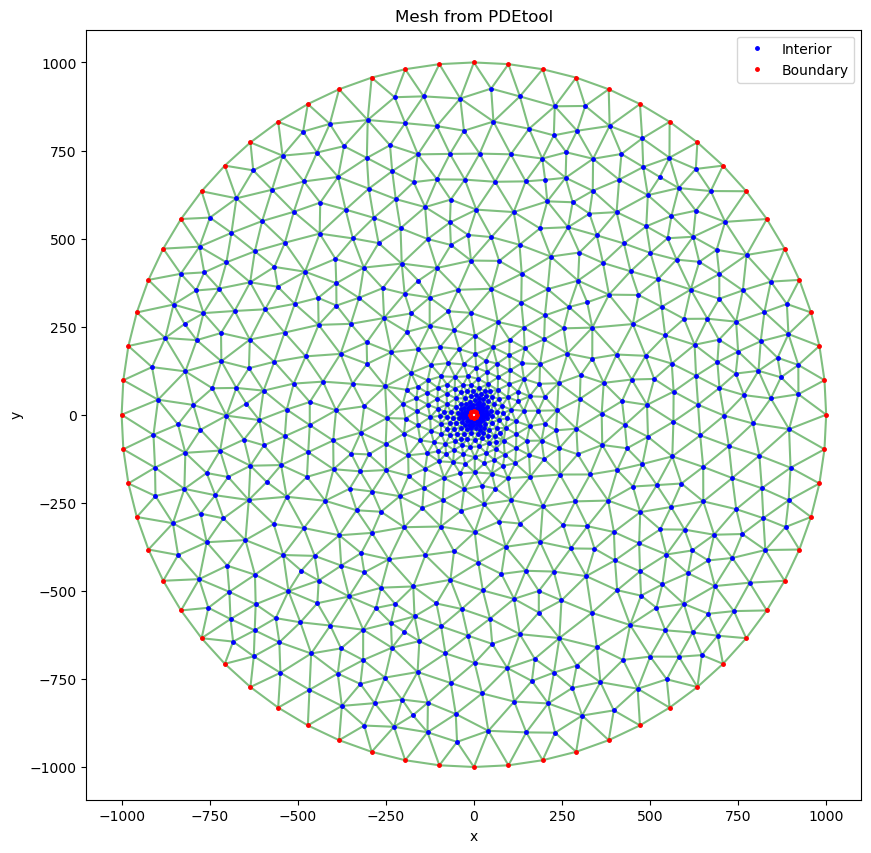

P shape: (766, 3)
Number of boundary points: 72
Number of interior points: 694


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the .mat file
data = sio.loadmat('p_e_t.mat')
p = data['p']
e = data['e']
t = data['t']

# Plot mesh
plt.figure(figsize=(10, 10))

# Plot elements (triangles)
plt.triplot(p[0,:], p[1,:], t[:3,:].T-1, 'g-', alpha=0.5)

# Interior nodes
interior_nodes = np.setdiff1d(range(p.shape[1]), e[0,:].astype(int)-1)
plt.plot(p[0,interior_nodes], p[1,interior_nodes], 'b.', markersize=5, label='Interior')

# Boundary nodes (from e matrix)
bc_nodes = np.unique(e[0,:].astype(int)-1)
plt.plot(p[0,bc_nodes], p[1,bc_nodes], 'r.', markersize=5, label='Boundary')

plt.axis('equal')
plt.title('Mesh from PDEtool')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Convert p array to tensor P with boundary tags
P = np.zeros((p.shape[1], 3))
P[:, 0] = p[0, :]  # x-coordinates
P[:, 1] = p[1, :]  # y-coordinates

# Set boundary tags
bc_nodes = np.unique(e[0,:].astype(int)-1)
P[bc_nodes, 2] = 1  # Tag boundary nodes as 1

# Convert to torch tensor
p = torch.tensor(P, dtype=torch.float)

print(f"P shape: {P.shape}")
print(f"Number of boundary points: {torch.sum(p[:,2] == 1)}")
print(f"Number of interior points: {torch.sum(p[:,2] == 0)}")

In [8]:
device =  "cpu"

class PointCloud:
    def __init__(self, points):
        self.points = points.to(device)
        self.m = len(points)
        self.nvec = 8  # Maximum number of neighbors
        self.neighbors = None
        self.Gamma_lap = None  # Laplacian
        self.Gamma_dx = None   # First x derivative
        self.Gamma_dy = None   # First y derivative
        self.device = points.device

    def find_neighbors(self):
        vec = torch.full((self.m, self.nvec), -1, dtype=torch.long, device=self.device)
        dmin = torch.ones(self.m, device=self.device)

        for i in range(self.m):
            x, y = self.points[i, :2]
            distances = torch.sqrt((self.points[:, 0] - x)**2 + (self.points[:, 1] - y)**2)
            distances[i] = float('inf')  # Exclude self
            dmin[i] = distances.min()

        dist = (3/2) * dmin.max()

        for i in range(self.m):
            x, y = self.points[i, :2]
            distances = torch.sqrt((self.points[:, 0] - x)**2 + (self.points[:, 1] - y)**2)
            neighbors = torch.where(distances < dist)[0]
            neighbors = neighbors[neighbors != i]  # Exclude self
            if len(neighbors) > self.nvec:
                neighbors = neighbors[torch.argsort(distances[neighbors])[:self.nvec]]
            vec[i, :len(neighbors)] = neighbors

        self.neighbors = vec

    def compute_gammas(self):
        # Define L vectors for each derivative
        L_lap = torch.tensor([0, 0, 2, 0, 2], dtype=torch.float, device=self.device)
        L_dx = torch.tensor([1, 0, 0, 0, 0], dtype=torch.float, device=self.device)
        L_dy = torch.tensor([0, 1, 0, 0, 0], dtype=torch.float, device=self.device)

        # Initialize Gamma tensors
        self.Gamma_lap = torch.zeros(self.m, self.nvec+1, device=self.device)
        self.Gamma_dx = torch.zeros(self.m, self.nvec+1, device=self.device)
        self.Gamma_dy = torch.zeros(self.m, self.nvec+1, device=self.device)

        for i in range(self.m):
            if self.points[i, 2] == 0:  # If not a boundary node
                neighbors = self.neighbors[i][self.neighbors[i] != -1]
                dx = self.points[neighbors, 0] - self.points[i, 0]
                dy = self.points[neighbors, 1] - self.points[i, 1]
                M = torch.stack([dx, dy, dx**2, dx*dy, dy**2])
                M_pinv = torch.pinverse(M)

                # Compute weights for each derivative
                YY_lap = M_pinv @ L_lap
                YY_dx = M_pinv @ L_dx
                YY_dy = M_pinv @ L_dy

                # Store weights with central point weight
                self.Gamma_lap[i, :len(neighbors)+1] = torch.cat([-YY_lap.sum().unsqueeze(0), YY_lap])
                self.Gamma_dx[i, :len(neighbors)+1] = torch.cat([-YY_dx.sum().unsqueeze(0), YY_dx])
                self.Gamma_dy[i, :len(neighbors)+1] = torch.cat([-YY_dy.sum().unsqueeze(0), YY_dy])

    def compute_derivative(self, u, Gamma):
        if u.dim() == 1:
            u = u.unsqueeze(0)
        derivative = torch.zeros_like(u)

        for i in range(self.m):
            neighbors = self.neighbors[i][self.neighbors[i] != -1]
            derivative[:, i] = (Gamma[i, 1:len(neighbors)+1] * u[:, neighbors]).sum(dim=1) + \
                               Gamma[i, 0] * u[:, i]

        return derivative.squeeze()

    def laplacian(self, u):
        return self.compute_derivative(u, self.Gamma_lap)

    def dx(self, u):
        return self.compute_derivative(u, self.Gamma_dx)

    def dy(self, u):
        return self.compute_derivative(u, self.Gamma_dy)

In [9]:
from scipy import special

class TheisFunction:
    def __init__(self, Q, T, S):
        self.Q = Q
        self.T = T
        self.S = S

    def __call__(self, r, t):
        u = (r**2 * self.S) / (4 * self.T * t)
        W = torch.tensor(-special.expi(-u.cpu().numpy()), device=r.device)
        s = (self.Q / (4 * np.pi * self.T)) * W
        return s

def analyze_domain(points):
    """Identify well radius and outer radius from point cloud data"""
    r = torch.sqrt(points[:, 0]**2 + points[:, 1]**2)
    boundary_points = points[points[:, 2] == 1]
    boundary_r = torch.sqrt(boundary_points[:, 0]**2 + boundary_points[:, 1]**2)
    well_radius = boundary_r.min().item()
    outer_radius = boundary_r.max().item()
    return well_radius, outer_radius

In [10]:
class GroundwaterSolver:
    def __init__(self, points, T, S, Q, dt, well_radius, outer_radius):
        self.device = points.device
        self.points = points
        self.T = T  # Transmissivity
        self.S = S  # Storage coefficient
        self.Q = Q  # Pumping rate
        self.dt = dt
        self.well_radius = well_radius
        self.outer_radius = outer_radius
        self.theis = TheisFunction(Q, T, S)

        # Initialize point cloud
        self.pc = PointCloud(points)
        self.pc.find_neighbors()
        self.pc.compute_gammas()

        # Precompute masks
        r = torch.sqrt(points[:, 0]**2 + points[:, 1]**2)
        self.well_mask = (points[:, 2] == 1)
        self.outer_mask = (points[:, 2] == 1)

    def get_boundary_conditions(self, t):
        """Apply Theis solution at boundaries"""
        r = torch.sqrt(self.points[:, 0]**2 + self.points[:, 1]**2)

        # Calculate drawdown using Theis solution
        s = self.theis(r, t)

        return s, self.well_mask, self.outer_mask

    def solve(self, total_time, h_initial=None):
        """Solve transient groundwater flow using Crank-Nicolson with direct linear solver"""
        n_steps = int(total_time / self.dt)
        n_points = len(self.points)

        # Initialize solution
        if h_initial is None:
            h = torch.zeros(n_points, device=self.device)
        else:
            h = h_initial.clone()

        h_history = [h.clone()]

        # Build system matrix once
        dt_term = self.S / self.dt
        I = torch.eye(n_points, device=self.device)

        # Get laplacian matrix
        L = torch.zeros((n_points, n_points), device=self.device)
        for i in range(n_points):
            neighbors = self.pc.neighbors[i][self.pc.neighbors[i] != -1]
            L[i, neighbors] = self.pc.Gamma_lap[i, 1:len(neighbors)+1]
            L[i, i] = self.pc.Gamma_lap[i, 0]

        # Crank-Nicolson matrices
        A = (dt_term * I - 0.5 * self.T * L)
        B = (dt_term * I + 0.5 * self.T * L)

        # Time stepping
        for step in range(n_steps):
            t = (step + 1) * self.dt

            # Get boundary conditions
            s_theis, well_mask, outer_mask = self.get_boundary_conditions(t)
            boundary_mask = well_mask | outer_mask

            # Modify system for boundary conditions
            A_mod = A.clone()
            b = B @ h

            # Set boundary rows
            A_mod[boundary_mask] = 0
            A_mod[boundary_mask, boundary_mask] = 1
            b[boundary_mask] = s_theis[boundary_mask]

            # Solve system
            h = torch.linalg.solve(A_mod, b)
            h_history.append(h.clone())

        return torch.stack(h_history)


In [11]:
# Parameters
T = 100.0  # Transmissivity
S = 1e-5  # Storage coefficient
Q = -1000.0  # Pumping rate (negative for extraction)
dt = 0.1    # Time step
well_radius = 10
outer_radius = 1000.0
# well_radius, outer_radius = analyze_domain(p)

total_time = 10.0

# Load point cloud (assuming it exists)


# Initialize and solve
solver = GroundwaterSolver(p, T, S, Q, dt, well_radius, outer_radius)
solution = solver.solve(total_time)


/tmp/ipykernel_3098229/2777194728.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


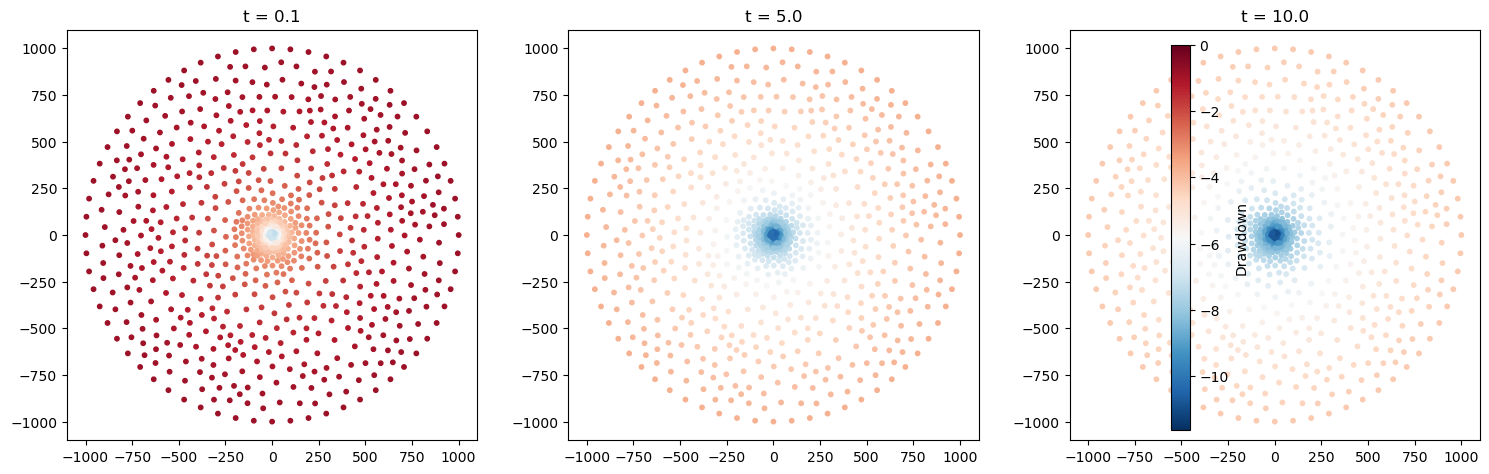

In [12]:
def plot_solution_snapshots(points, solution, dt, times, figsize=(15, 5)):
    """
    Plot solution snapshots at specified times
    """
    n_times = len(times)
    fig, axes = plt.subplots(1, n_times, figsize=figsize)

    # Convert times to indices
    time_indices = [int(t/dt) for t in times]
    time_indices = [min(i, len(solution)-1) for i in time_indices]  # Prevent index out of bounds

    # Move solution to CPU if it's on GPU
    solution = solution.cpu()
    points = points.cpu()

    # Set color scale based on all timesteps
    vmin = solution.min()
    vmax = solution.max()

    for i, (ax, t_idx) in enumerate(zip(axes, time_indices)):
        scatter = ax.scatter(points[:, 0], points[:, 1],
                           c=solution[t_idx],
                           cmap='RdBu_r',  # Better for showing drawdown
                           s = 10, vmin=vmin, vmax=vmax)
        ax.set_aspect('equal')
        ax.set_title(f't = {times[i]:.1f}')

    fig.colorbar(scatter, ax=axes.ravel().tolist(), label='Drawdown')
    plt.tight_layout()
    return fig

# Usage example:
times_to_plot = [0.1, 5.0, 10.0]
fig = plot_solution_snapshots(p, solution, dt, times_to_plot)
plt.show()

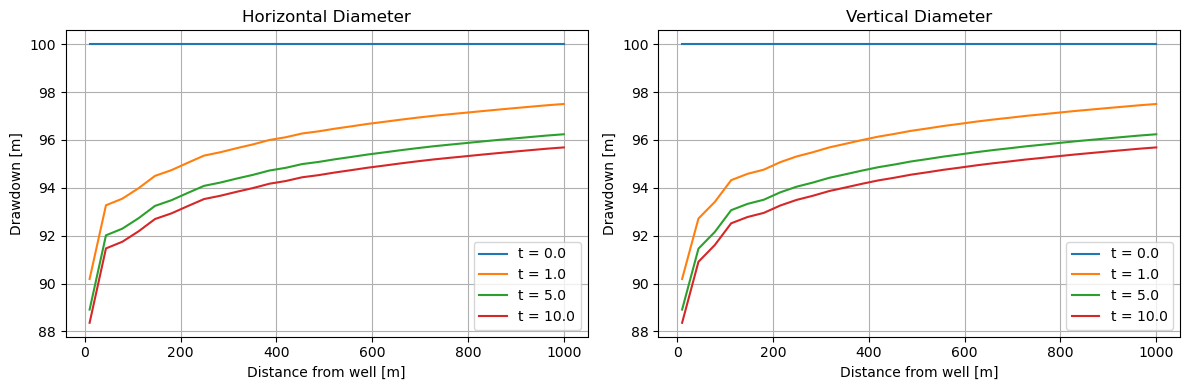

In [13]:
def plot_along_diameters(points, solution, dt, times, well_radius, n_interp=30):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Create interpolation points along diameters
    R = torch.sqrt(points[:, 0]**2 + points[:, 1]**2).max()
    x_interp = torch.linspace(well_radius, R, n_interp).to(points.device)

    time_indices = [int(t/dt) for t in times]
    time_indices = [min(i, len(solution)-1) for i in time_indices]

    solution = solution.cpu()
    points = points.cpu()
    x_interp = x_interp.cpu()

    for t_idx in time_indices:
        # Horizontal diameter (y ≈ 0)
        mask_h = (torch.abs(points[:, 1]) < R/10) & (points[:, 0] >= well_radius)
        x_h = points[mask_h, 0]
        s_h = solution[t_idx][mask_h]

        sort_idx = torch.argsort(x_h)
        x_h = x_h[sort_idx]
        s_h = s_h[sort_idx]

        y_h = torch.tensor(np.interp(x_interp, x_h, s_h))
        ax1.plot(x_interp, 100 + y_h, label=f't = {times[time_indices.index(t_idx)]:.1f}')

        # Vertical diameter (x ≈ 0)
        mask_v = (torch.abs(points[:, 0]) < R/10) & (torch.abs(points[:, 1]) >= well_radius)
        y_v = points[mask_v, 1]
        s_v = solution[t_idx][mask_v]

        sort_idx = torch.argsort(y_v)
        y_v = y_v[sort_idx]
        s_v = s_v[sort_idx]

        y_v_interp = torch.tensor(np.interp(x_interp, y_v, s_v))
        ax2.plot(x_interp, 100 + y_v_interp, label=f't = {times[time_indices.index(t_idx)]:.1f}')

    ax1.set_title('Horizontal Diameter')
    ax2.set_title('Vertical Diameter')
    ax1.set_xlabel('Distance from well [m]')
    ax2.set_xlabel('Distance from well [m]')
    ax1.set_ylabel('Drawdown [m]')
    ax2.set_ylabel('Drawdown [m]')
    ax1.legend()
    ax2.legend()
    ax1.grid(True)
    ax2.grid(True)

    plt.tight_layout()
    return fig

# Usage
times_to_plot = [0.0, 1.0, 5.0, 10]
fig = plot_along_diameters(p, solution, dt, times_to_plot, well_radius)
plt.show()

/tmp/ipykernel_3098229/1102817073.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


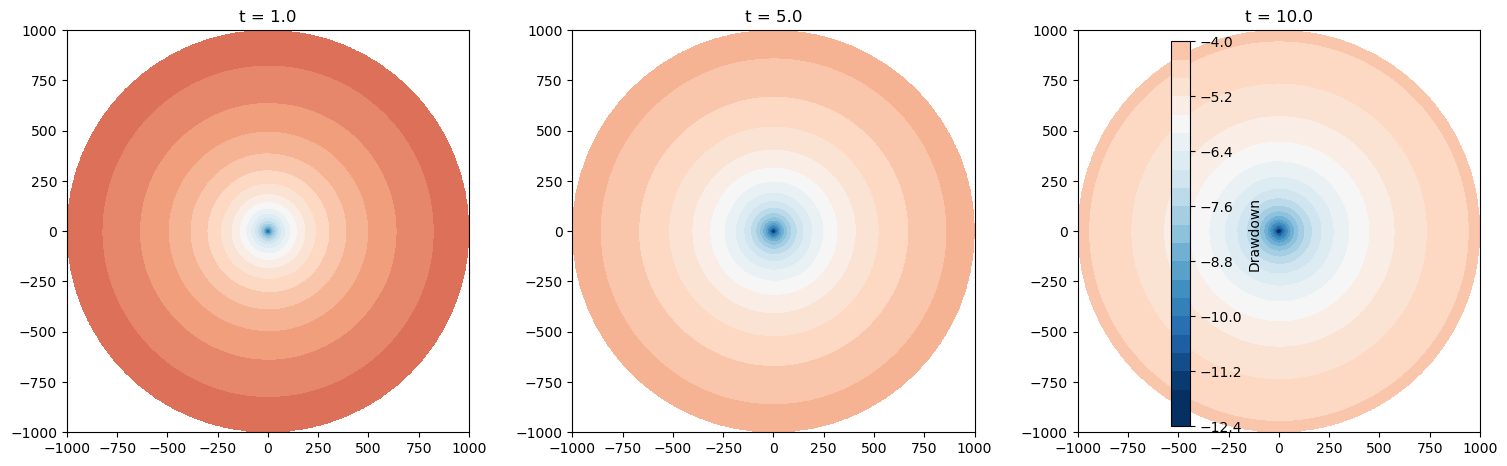

In [14]:
from scipy.interpolate import griddata
def plot_solution_snapshots(points, solution, dt, times, figsize=(15, 5), n_grid=1000):
    n_times = len(times)
    fig, axes = plt.subplots(1, n_times, figsize=figsize)

    # Setup grid
    x = points[:, 0].cpu()
    y = points[:, 1].cpu()
    margin = 0.1
    x_grid = np.linspace(x.min()-margin, x.max()+margin, n_grid)
    y_grid = np.linspace(y.min()-margin, y.max()+margin, n_grid)
    X, Y = np.meshgrid(x_grid, y_grid)

    time_indices = [min(int(t/dt), len(solution)-1) for t in times]
    solution = solution.cpu()

    vmin, vmax = solution.min(), solution.max()

    for i, (ax, t_idx) in enumerate(zip(axes, time_indices)):
        # Interpolate solution onto grid
        points_for_interp = np.column_stack((x, y))
        grid_points = np.column_stack((X.ravel(), Y.ravel()))
        Z = griddata(points_for_interp, solution[t_idx], grid_points, method='cubic')
        Z = Z.reshape(X.shape)

        # Create mask for well
        r = np.sqrt(X**2 + Y**2)
        mask = r > 0.1  # Adjust well radius as needed
        Z = np.ma.masked_where(~mask, Z)

        # Plot contour
        contour = ax.contourf(X, Y, Z, levels=20, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        ax.set_aspect('equal')
        ax.set_title(f't = {times[i]:.1f}')

    fig.colorbar(contour, ax=axes.ravel().tolist(), label='Drawdown')
    plt.tight_layout()
    return fig

# Required import at top:

# Usage example:
times_to_plot = [1.0, 5.0, 10.0]
fig = plot_solution_snapshots(p, solution, dt, times_to_plot)
plt.show()

In [15]:
import numpy as np

def write_to_tecplot(filename, points, solutions, dt, times):
    with open(filename, 'w') as file:
        file.write('TITLE = "Groundwater Flow Simulation Results"\n')
        file.write('VARIABLES = "X" "Y" "Hydraulic Head"\n')

        for i, time in enumerate(times):
            # Access the solution at the specific time index
            time_index = min(int(time / dt), len(solutions) - 1)
            solution = 100 + solutions[time_index]

            # Write the zone header for each time step
            file.write(f'ZONE T="Time {time:.2f}s", I={points.shape[0]}, DATAPACKING=POINT\n')

            for point, sol in zip(points, solution):
                file.write(f"{point[0]:.6f} {point[1]:.6f} {sol:.6f}\n")

# Example usage
dt = 0.1  # Time step duration
times = [1, 3, 5, 7, 10]  # Specific times to output

write_to_tecplot("groundwater_flow.dat", p, solution, dt, times)


/tmp/ipykernel_3098229/2029245253.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


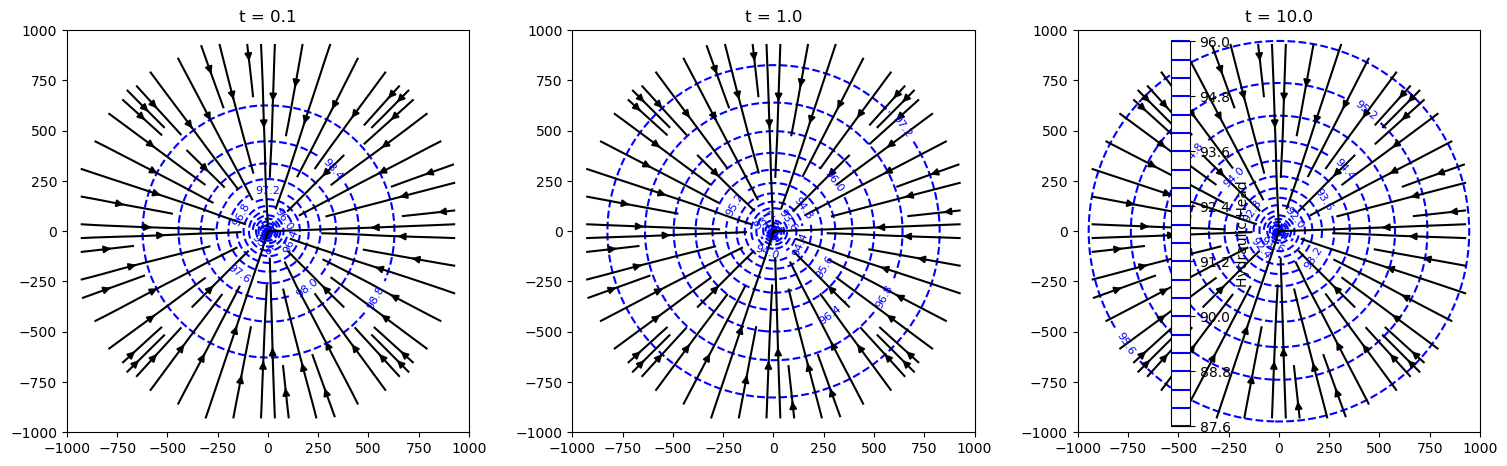

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_solution_snapshots(points, h0, solution, dt, times, figsize=(15, 5), n_grid=1000):
    solution = h0 + solution
    n_times = len(times)
    fig, axes = plt.subplots(1, n_times, figsize=figsize)

    x = points[:, 0].cpu()
    y = points[:, 1].cpu()
    margin = 0.1
    x_grid = np.linspace(x.min()-margin, x.max()+margin, n_grid)
    y_grid = np.linspace(y.min()-margin, y.max()+margin, n_grid)
    X, Y = np.meshgrid(x_grid, y_grid)

    time_indices = [min(int(t/dt), len(solution)-1) for t in times]
    solution = solution.cpu()

    for i, (ax, t_idx) in enumerate(zip(axes, time_indices)):
        points_for_interp = np.column_stack((x, y))
        grid_points = np.column_stack((X.ravel(), Y.ravel()))
        Z = griddata(points_for_interp, solution[t_idx], grid_points, method='cubic')
        Z = Z.reshape(X.shape)

        # Correctly calculate gradients (negative of hydraulic head gradient)
        dy, dx = np.gradient(-Z, y_grid, x_grid)

        # Plot equipotential lines
        contour = ax.contour(X, Y, Z, levels=20, colors='blue', linestyles='dashed')
        ax.clabel(contour, inline=True, fontsize=8)

        # Plot flow lines
        ax.streamplot(X, Y, dx, dy, color='black', density=1)

        ax.set_aspect('equal')
        ax.set_title(f't = {times[i]:.1f}')

    fig.colorbar(contour, ax=axes.ravel().tolist(), label='Hydraulic Head')
    plt.tight_layout()
    return fig

# Example usage
times_to_plot = [0.1, 1.0, 10.0]
fig = plot_solution_snapshots(p, 100, solution, dt, times_to_plot)
plt.show()


In [18]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

def plot_mesh(p, e, t):
    """
    Plot the mesh to visualize the geometry and node distribution
    """
    plt.figure(figsize=(10, 10))

    # Plot elements (triangles)
    plt.triplot(p[0,:], p[1,:], t[:3,:].T-1, 'g-', alpha=0.5)

    # Interior nodes
    interior_nodes = np.setdiff1d(range(p.shape[1]), e[0,:].astype(int)-1)
    plt.plot(p[0,interior_nodes], p[1,interior_nodes], 'b.',
             markersize=5, label='Interior')

    # Boundary nodes (from e matrix)
    bc_nodes = np.unique(e[0,:].astype(int)-1)
    plt.plot(p[0,bc_nodes], p[1,bc_nodes], 'r.',
             markersize=5, label='Boundary')

    plt.axis('equal')
    plt.title('Mesh from PDEtool')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def export_to_tecplot(p, t, u, filename, time_values=None):
    """
    Export mesh and transient solution data to Tecplot format.

    Parameters:
    -----------
    p : ndarray
        Node coordinates matrix (2 x num_nodes)
    t : ndarray
        Triangle connectivity matrix (4 x num_triangles)
    u : ndarray
        Solution values. For transient solutions, shape should be (num_nodes, num_timesteps)
        For steady state, shape should be (num_nodes,)
    filename : str
        Output filename (should end with .dat)
    time_values : ndarray, optional
        Time values corresponding to solution steps
    """

    # Ensure proper dimensions and transpose if needed
    if u.ndim == 1:
        u = u.reshape(-1, 1)  # Convert to 2D array for single timestep

    num_nodes = p.shape[1]
    num_elements = t.shape[1]
    num_timesteps = u.shape[1]  # Number of time steps is now in second dimension

    # If time values not provided, create default ones
    if time_values is None:
        time_values = np.arange(num_timesteps)

    with open(filename, 'w') as f:
        # Write header
        f.write('TITLE = "PDE Solution"\n')
        f.write('VARIABLES = "X" "Y" "U"\n')

        # Write data for each time step
        for time_idx in range(num_timesteps):
            # Zone header for current time step
            f.write(f'ZONE T="Time {time_values[time_idx]:.6f}"\n')
            f.write(f'SOLUTIONTIME={time_values[time_idx]:.6f}\n')
            f.write(f'NODES={num_nodes}\n')
            f.write(f'ELEMENTS={num_elements}\n')
            f.write('ZONETYPE=FETRIANGLE\n')
            f.write('DATAPACKING=BLOCK\n')

            # Write node coordinates and solution values
            # X coordinates
            for i in range(num_nodes):
                f.write(f'{p[0,i]:.8e} ')
                if (i+1) % 10 == 0:
                    f.write('\n')
            f.write('\n')

            # Y coordinates
            for i in range(num_nodes):
                f.write(f'{p[1,i]:.8e} ')
                if (i+1) % 10 == 0:
                    f.write('\n')
            f.write('\n')

            # Solution values
            for i in range(num_nodes):
                f.write(f'{u[i,time_idx]:.8e} ')  # Changed indexing here
                if (i+1) % 10 == 0:
                    f.write('\n')
            f.write('\n')

            # Write connectivity (subtract 1 since Python is 0-based)
            for i in range(num_elements):
                f.write(f'{t[0,i]} {t[1,i]} {t[2,i]}\n')

            f.write('\n')  # Separate zones with blank line
